**IMPORTANT **
no need to run this code again as all files are saved just use them




in this first part of problem i will preprocess the dat ,remove corrupted dat,splitting the data and augmentaion of data to get more training example
and saved them on google drive


In [0]:
#Copyright (c) 2019 Intel Corporation.

#Permission is hereby granted, free of charge, to any person obtaining
#a copy of this software and associated documentation files (the
#"Software"), to deal in the Software without restriction, including
#without limitation the rights to use, copy, modify, merge, publish,
#distribute, sublicense, and/or sell copies of the Software, and to
#permit persons to whom the Software is furnished to do so, subject to
#the following conditions:

#The above copyright notice and this permission notice shall be
#included in all copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
#EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
#MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
#NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE
#LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
#OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
#WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from PIL import Image
import cv2
import os

   
def display_images(directory, numOfImages = 5):
    file_list = glob.glob(directory + "/*/*")
    indicies = random.sample(range(len(file_list)), numOfImages * numOfImages)    
    fig, axes = plt.subplots(nrows=numOfImages,ncols=numOfImages, figsize=(15,15), sharex=True, sharey=True, frameon=False)
    for i,ax in enumerate(axes.flat):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #Pick a random picture from the file list
        imgplot = mpimg.imread(file_list[indicies[i]], 0)
        ax.imshow(imgplot)
        ax.text(10,20,file_list[indicies[i]].split("/")[-2], fontdict={"backgroundcolor": "black","color": "white" })
        ax.axis('off')
    plt.tight_layout(h_pad=0, w_pad=0)
    

def resize_image(file, size=299):
    img = Image.open(file)
    img = img.resize((size,size))
    img.save(file)

def check_image(file):
    if not file.endswith(".jpg"):
        #Not ending in .jpg
        print("Deleting (.mat): " + file)
        os.remove(os.path.join(os.getcwd(), file))
    else: 
        flags = cv2.IMREAD_COLOR
        im = cv2.imread(file, flags)
        
        if im is None:
            #Can't read in image
            print("Deleting (None): " + file)
            os.remove(os.path.join(os.getcwd(), file))
        elif len(im.shape) != 3:
            #Wrong amount of channels
            print("Deleting (len != 3): " + file)
            os.remove(os.path.join(os.getcwd(), file))
        elif im.shape[2] != 3:
            #Wrong amount of channels
            print("Deleting (shape[2] != 3): " + file)
            os.remove(os.path.join(os.getcwd(), file))
            
        if os.path.exists(os.path.join(os.getcwd(), file)):
            f = open(os.path.join(os.getcwd(), file), 'rb')
            check_chars = f.read()
            if check_chars[-2:] != b'\xff\xd9':
                #Wrong ending metadata for jpg standard
                print('Deleting (xd9): ' + file)
                os.remove(os.path.join(os.getcwd(), file))
            elif check_chars[:4] != b'\xff\xd8\xff\xe0':
                #Wrong Start Marker / JFIF Marker metadata for jpg standard
                print('Deleting (xd8/xe0): ' + file)
                os.remove(os.path.join(os.getcwd(), file))
            elif check_chars[6:10] != b'JFIF':
                #Wrong Identifier metadata for jpg standard
                print('Deleting (xd8/xe0): ' + file)
                os.remove(os.path.join(os.getcwd(), file))
            elif "beagle_116.jpg" in file or "chihuahua_121.jpg" in file:
                #Using EXIF Data to determine this
                print('Deleting (corrupt jpeg data): ', file)
                os.remove(os.path.join(os.getcwd(), file))  


In [0]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
cars = {
    "honda_civic_1998": ["honda_civic_1997", "honda_civic_1998"], # available "honda_civic_1999"
    "honda_accord_1997": ["honda_accord_1996", "honda_accord_1997"],
    "ford_f150_2006": ["ford_f150_2005", "ford_f150_2006", "ford_f150_2007"],
    "chevrolet_silverado_2004": ["chevrolet_silverado_2003", "chevrolet_silverado_2004"], # available "chevrolet_silverado_2005"
    "toyota_camry_2014": ["toyota_camry_2012", "toyota_camry_2013", "toyota_camry_2014", "toyota_camry_le_2012", "toyota_camry_le_2013", "toyota_camry_le_2014", "toyota_camry_se_2012", "toyota_camry_se_2013", "toyota_camry_xle_2012", "toyota_camry_xle_2013"],
    "nissan_altima_2014": ["nissan_altima_2013", "nissan_altima_2014", "nissan_altima_2015"],
    "toyota_corolla_2013": ["toyota_corolla_2011", "toyota_corolla_2012", "toyota_corolla_2013", "toyota_corolla_ce_2012", "toyota_corolla_le_2012", "toyota_corolla_le_2013", "toyota_corolla_s_2011", "toyota_corolla_s_2012"],
    "dodge_ram_2001": ["dodge_ram_1500_2000", "dodge_ram_1500_2001", "dodge_ram_1500_1999", "dodge_ram_1500_1998", "dodge_ram_1500_1997", "dodge_ram_1500_1996", "dodge_ram_1500_1995"],
    "gmc_sierra_2012": ["gmc_sierra_1500_2007", "gmc_sierra_1500_2008", "gmc_sierra_1500_2009", "gmc_sierra_1500_2010", "gmc_sierra_1500_2011", "gmc_sierra_1500_2012", "gmc_sierra_1500_2013", "gmc_sierra_2500_2007", "gmc_sierra_2500_2008", "gmc_sierra_2500_2009", "gmc_sierra_2500_2010", "gmc_sierra_2500_2011", "gmc_sierra_2500_2012", "gmc_sierra_2500_2013"],
    "chevrolet_impala_2008": ["chevrolet_impala_2007", "chevrolet_impala_2008", "chevrolet_impala_2009"]
}


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
full_dataset_path="/content/drive/My Drive/database_folder/car_theft/SubsetVMMR"
stolen_cars_path="/content/drive/My Drive/database_folder/car_theft/Most_Stolen_Cars"

select and merge interested/similar car type as per the dictionary
 describe above car
 

AS below code is to merge and create file for further this need to be run once and saved the file ,which i have saved in google drive so no need to run this again

In [33]:
# # to check stolen car file exist or not
# # if exist than remove the directory and create new directory

# if os.path.exists(stolen_cars_path):
#   shutil.rmtree(stolen_cars_path)
# else: 
#   os.makedirs(stolen_cars_path)

# for directory,car_list in cars.items():
#   #here traverse by abc.item() is done to get both key and value in dictionary
#   #first output will be key and second will be item
#   #over here i have list of value in item 
#   #so i have to traverse along list of each item
#   print("Creating",directory)
#   car_directory_name=os.path.join(stolen_cars_path,directory)
#   os.makedirs(car_directory_name)
#   for car in car_list:
#     path=os.path.join(full_dataset_path,car,"")#creating folder for each car type
#     files=glob.glob(path+'*.jpg')
#     for file in files:
#       shutil.copy(file,car_directory_name)



Creating honda_civic_1998
Creating honda_accord_1997
Creating ford_f150_2006
Creating chevrolet_silverado_2004
Creating toyota_camry_2014
Creating nissan_altima_2014
Creating toyota_corolla_2013
Creating dodge_ram_2001
Creating gmc_sierra_2012
Creating chevrolet_impala_2008


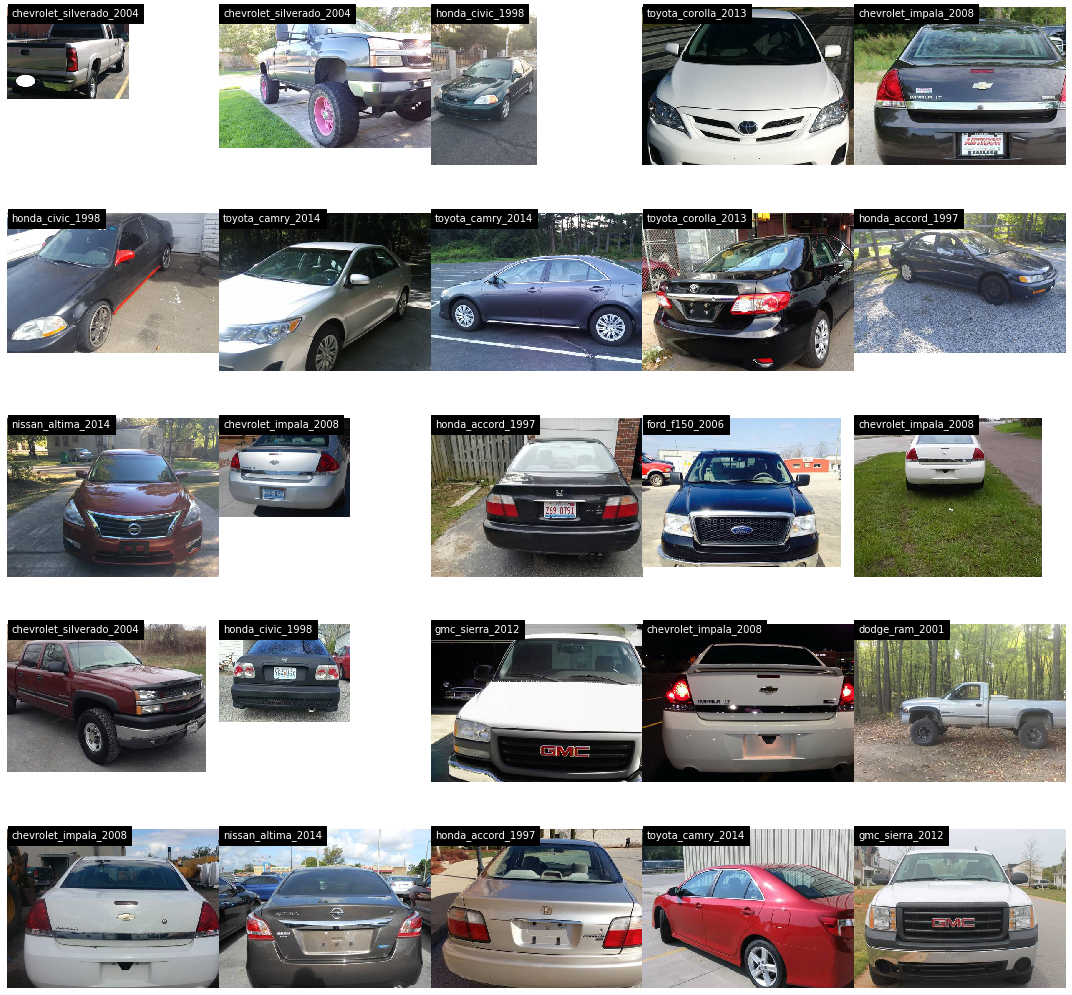

In [8]:
display_images(stolen_cars_path)

remove invalid ,corrupt and non-jpg image

below code is neded to run once only for removing the corrupt images which i have already done




In [0]:
# from multiprocessing import Pool
# # this will be added to done processing of data in parallel
# # there are two way of parallel processing 
# # pool and process
# # pool is done when we have huge number of task to be done in parallel
# # it select some number of processor and divide the work among them in FIFO
# # and store the result until all the work is completed 

# # process
# # is used when have few task to be done
# # select ine processor for each work 

# if __name__=='__main__':
#   pool=Pool()
#   image_list=glob.glob(stolen_cars_path+"/*/*")
#   pool.map(check_image,image_list)#vmmr utils will remove corrupt images
#   pool.close()

# print('Done')


In [11]:
!pip install pygal

     |████████████████████████████████| 133kB 10.8MB/s 


In [0]:
import pygal
#this library is for interactive pychart and graphs
from IPython.display import display,HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""


In [22]:

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

#compare class distribution

line_chart=pygal.Bar(height=300)
line_chart.title='Stolen car class distribution'
for o in os.listdir(stolen_cars_path):
  line_chart.add(o, len(os.listdir(os.path.join(stolen_cars_path, o))))
galplot(line_chart)


In [23]:
#Confirm Folder Structure
for root, dirs, files in os.walk(stolen_cars_path):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "...")) 

                    Most_Stolen_Cars/
                        ...
                        honda_civic_1998/
                            00B0B_dH26eG11NBY_600x450.jpg
                            00B0B_eV5Vlswksof_600x450.jpg
                            ...
                        honda_accord_1997/
                            00C0C_bqaVdnE7GRs_600x450.jpg
                            00101_awascPUKoeK_600x450.jpg
                            ...
                        ford_f150_2006/
                            2005 Ford 150_00a0a_883cwK1gqaZ_600x450.jpg
                            2005 F150_00Y0Y_jS7y9rjGEVR_600x450.jpg
                            ...
                        chevrolet_silverado_2004/
                            2003 Chevrolet Silverado 1500 Z71_00B0B_9k0rOC7CpBF_600x450.jpg
                            2003 Chevrolet Silverado 1500 Z71_00S0S_cUjC21KRZVQ_600x450.jpg
                            ...
                        toyota_camry_2014/
                            2012

In [0]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.1,.2) # 70/10/20 Data Split
test_folder = '/content/drive/My Drive/database_folder/car_theft/test/'
train_folder = '/content/drive/My Drive/database_folder/car_theft/train/'
val_folder = '/content/drive/My Drive/database_folder/car_theft/val/'


file_names=os.listdir("/content/drive/My Drive/database_folder/car_theft/Most_Stolen_Cars")


In [27]:
# splitting data in test and train



#removing existing folder if any

for folder in [test_folder,train_folder,val_folder]:
  if os.path.exists(folder) and os.path.isdir(folder):
    shutil.rmtree(folder)


#making sub folder in test,train,val folder

for category in file_names:
  os.makedirs(test_folder+category)
  os.makedirs(train_folder+category)
  os.makedirs(val_folder+category)


#splitting data into new folder

for idx,category in enumerate(file_names):
  #enumerate add index in iterateable object
  file_list=os.listdir(stolen_cars_path+'/'+category)
  train_ratio = math.floor(len(file_list)*train_val_test_ratio[0])
  val_ratio = math.floor(len(file_list)*train_val_test_ratio[1])

  train_list=file_list[:train_ratio]
  val_list=file_list[train_ratio:val_ratio+train_ratio]
  test_list=file_list[val_ratio+train_ratio:]

  #now copying images
  for i ,file in enumerate(train_list):
    #shutilcopy copy file/data from address1 to address2(address1 ,address2)
    shutil.copy(stolen_cars_path+'/'+category+'/'+file,train_folder+'/'+category+'/'+file)
  sys.stdout.write('Moving %s train images to category folder %s'%(len(train_list),category))
  sys.stdout.write('\n')

  for i ,file in enumerate(val_list):
    #shutilcopy copy file/data from address1 to address2(address1 ,address2)
    shutil.copy(stolen_cars_path+'/'+category+'/'+file,val_folder+'/'+category+'/'+file)
  sys.stdout.write('Moving %s val images to category folder %s'%(len(val_list),category))
  sys.stdout.write('\n')
  for i ,file in enumerate(test_list):
    #shutilcopy copy file/data from address1 to address2(address1 ,address2)
    shutil.copy(stolen_cars_path+'/'+category+'/'+file,test_folder+'/'+category+'/'+file)
  sys.stdout.write('Moving %s train images to category folder %s'%(len(test_list),category))
  sys.stdout.write('\n')


print('done')




Moving 576 train images to category folder honda_civic_1998
Moving 82 val images to category folder honda_civic_1998
Moving 166 train images to category folder honda_civic_1998
Moving 452 train images to category folder honda_accord_1997
Moving 64 val images to category folder honda_accord_1997
Moving 131 train images to category folder honda_accord_1997
Moving 620 train images to category folder ford_f150_2006
Moving 88 val images to category folder ford_f150_2006
Moving 178 train images to category folder ford_f150_2006
Moving 575 train images to category folder chevrolet_silverado_2004
Moving 82 val images to category folder chevrolet_silverado_2004
Moving 165 train images to category folder chevrolet_silverado_2004
Moving 230 train images to category folder toyota_camry_2014
Moving 33 val images to category folder toyota_camry_2014
Moving 67 train images to category folder toyota_camry_2014
Moving 239 train images to category folder nissan_altima_2014
Moving 34 val images to catego

sample augmentation

In [28]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

Using TensorFlow backend.


In [0]:
#select random img and modify it as
datagen=ImageDataGenerator(rotation_range=45,
                          width_shift_range=.2,
                          height_shift_range=.2,
                          zoom_range=.3,
                          vertical_flip=True,
                          horizontal_flip=True,
                          fill_mode="nearest")

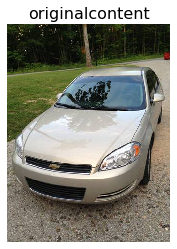

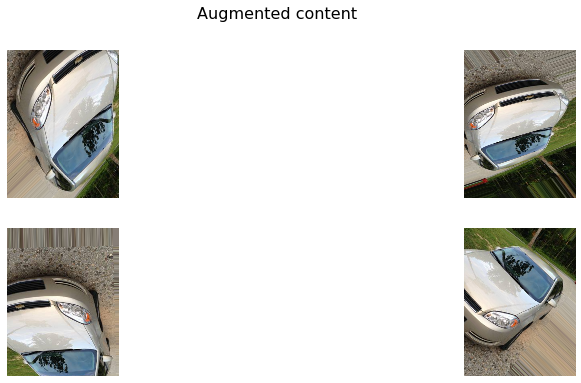

In [34]:
# example img
file_list=glob.glob("/content/drive/My Drive/database_folder/car_theft/test/chevrolet_impala_2008")

# img_path=random.choice(file_list)
img_path='/content/drive/My Drive/database_folder/car_theft/test/chevrolet_impala_2008/00404_2oZz8iFzGXf_600x450.jpg'
img=load_img(img_path)
car_class=img_path.split("/")[1]
plt.imshow(img)
plt.axis('off')
plt.title("original"+car_class,fontsize=16)

img=img_to_array(img)
img=img.reshape((1,)+img.shape)

#applying augmentaion

n_augmentations=4
plt.figure(figsize=(15,6))
i=0
for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    plt.suptitle("Augmented " + car_class, fontsize=16)    
    
    i += 1
    if i >= n_augmentations:
        break

In [0]:
#Oversampling Minority Classes in Training Set
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)
    datagen = ImageDataGenerator(rotation_range=45, 
        horizontal_flip=True, 
        fill_mode="nearest")
    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)
        img = load_img(tmp_img_name)
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)

        batch = datagen.flow(img, 
            batch_size=1, 
            seed=21,
            save_to_dir=data_dir, 
            save_prefix=img_name.split(".jpg")[0] + "augmented", 
            save_format="jpg")

        batch.next()



In [36]:
classes_to_augment = [
    "toyota_camry_2014",
    "nissan_altima_2014",
    "toyota_corolla_2013",
    "gmc_sierra_2012"]

for class_names in classes_to_augment:
    print("Currently Augmenting:", class_names)
    data_dir = os.path.join(train_folder, class_names)
    data_augment(data_dir)

Currently Augmenting: toyota_camry_2014
Currently Augmenting: nissan_altima_2014
Currently Augmenting: toyota_corolla_2013
Currently Augmenting: gmc_sierra_2012


resize image

this is impt bcoz in our main model we will use cnn and inception ,for which define size of image required

we will use image size of 299x299
hence we will convert all the images into 299 size

In [0]:
from functools import partial

if __name__=='__main__':
  pool=Pool()
  image_list=glob.glob(train_folder+"/*/*")
  func=partial(resize_image,size=299)
  pool.map(func,image_list)
  pool.close()



thing to be noted overhere is that how python image library command
image.resize() maintain the whole image and reduce its size
 

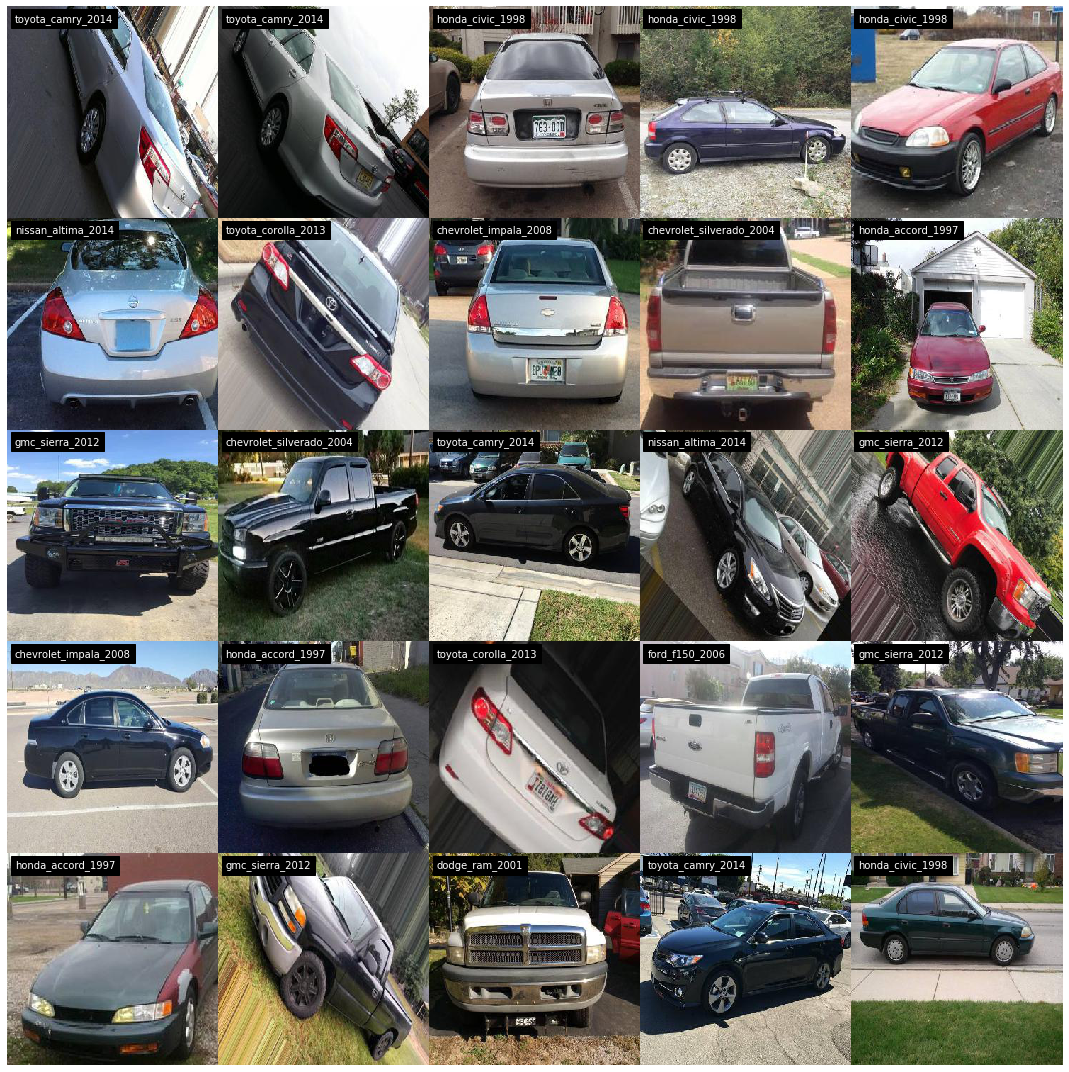

In [38]:
display_images(train_folder)

In [39]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Most Stolen Car Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)   